<a href="https://colab.research.google.com/github/Azorrockss/Assignment-1/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORT THE LIBRARIES....

import numpy as np # Linear algebra....

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....

from matplotlib import pyplot as plt #Visualization of the data....

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)

import plotly.graph_objs as go

import matplotlib as mpl

import matplotlib.patches as mpatches

import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import StandardScaler

from plotly import tools

from plotly.subplots import make_subplots

from plotly.offline import iplot

In [154]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [155]:
df.Attrition_Flag.value_counts() #target variable

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [156]:
df.Gender.value_counts() # gender of customers

Gender
F    5358
M    4769
Name: count, dtype: int64

In [ ]:
df.Marital_Status.value_counts() # marital status of customers

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Performing Basic Data Sets

In [ ]:
df.shape # shape of the dataset

(10127, 23)

In [ ]:
df = df.iloc[: ,  1:-2] # Dropping the last two columns and the client number columns

In [ ]:
df.shape

(10127, 20)

In [ ]:
df.ndim # dimensions of the dataset

2

In [158]:
df.size # size of the dataset 10127*20

232921

In [157]:
df.columns # the columns we have in a dataset

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [159]:
df.dtypes # the dtypes we have in a dataset

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [ ]:
df.info() # the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<Axes: >

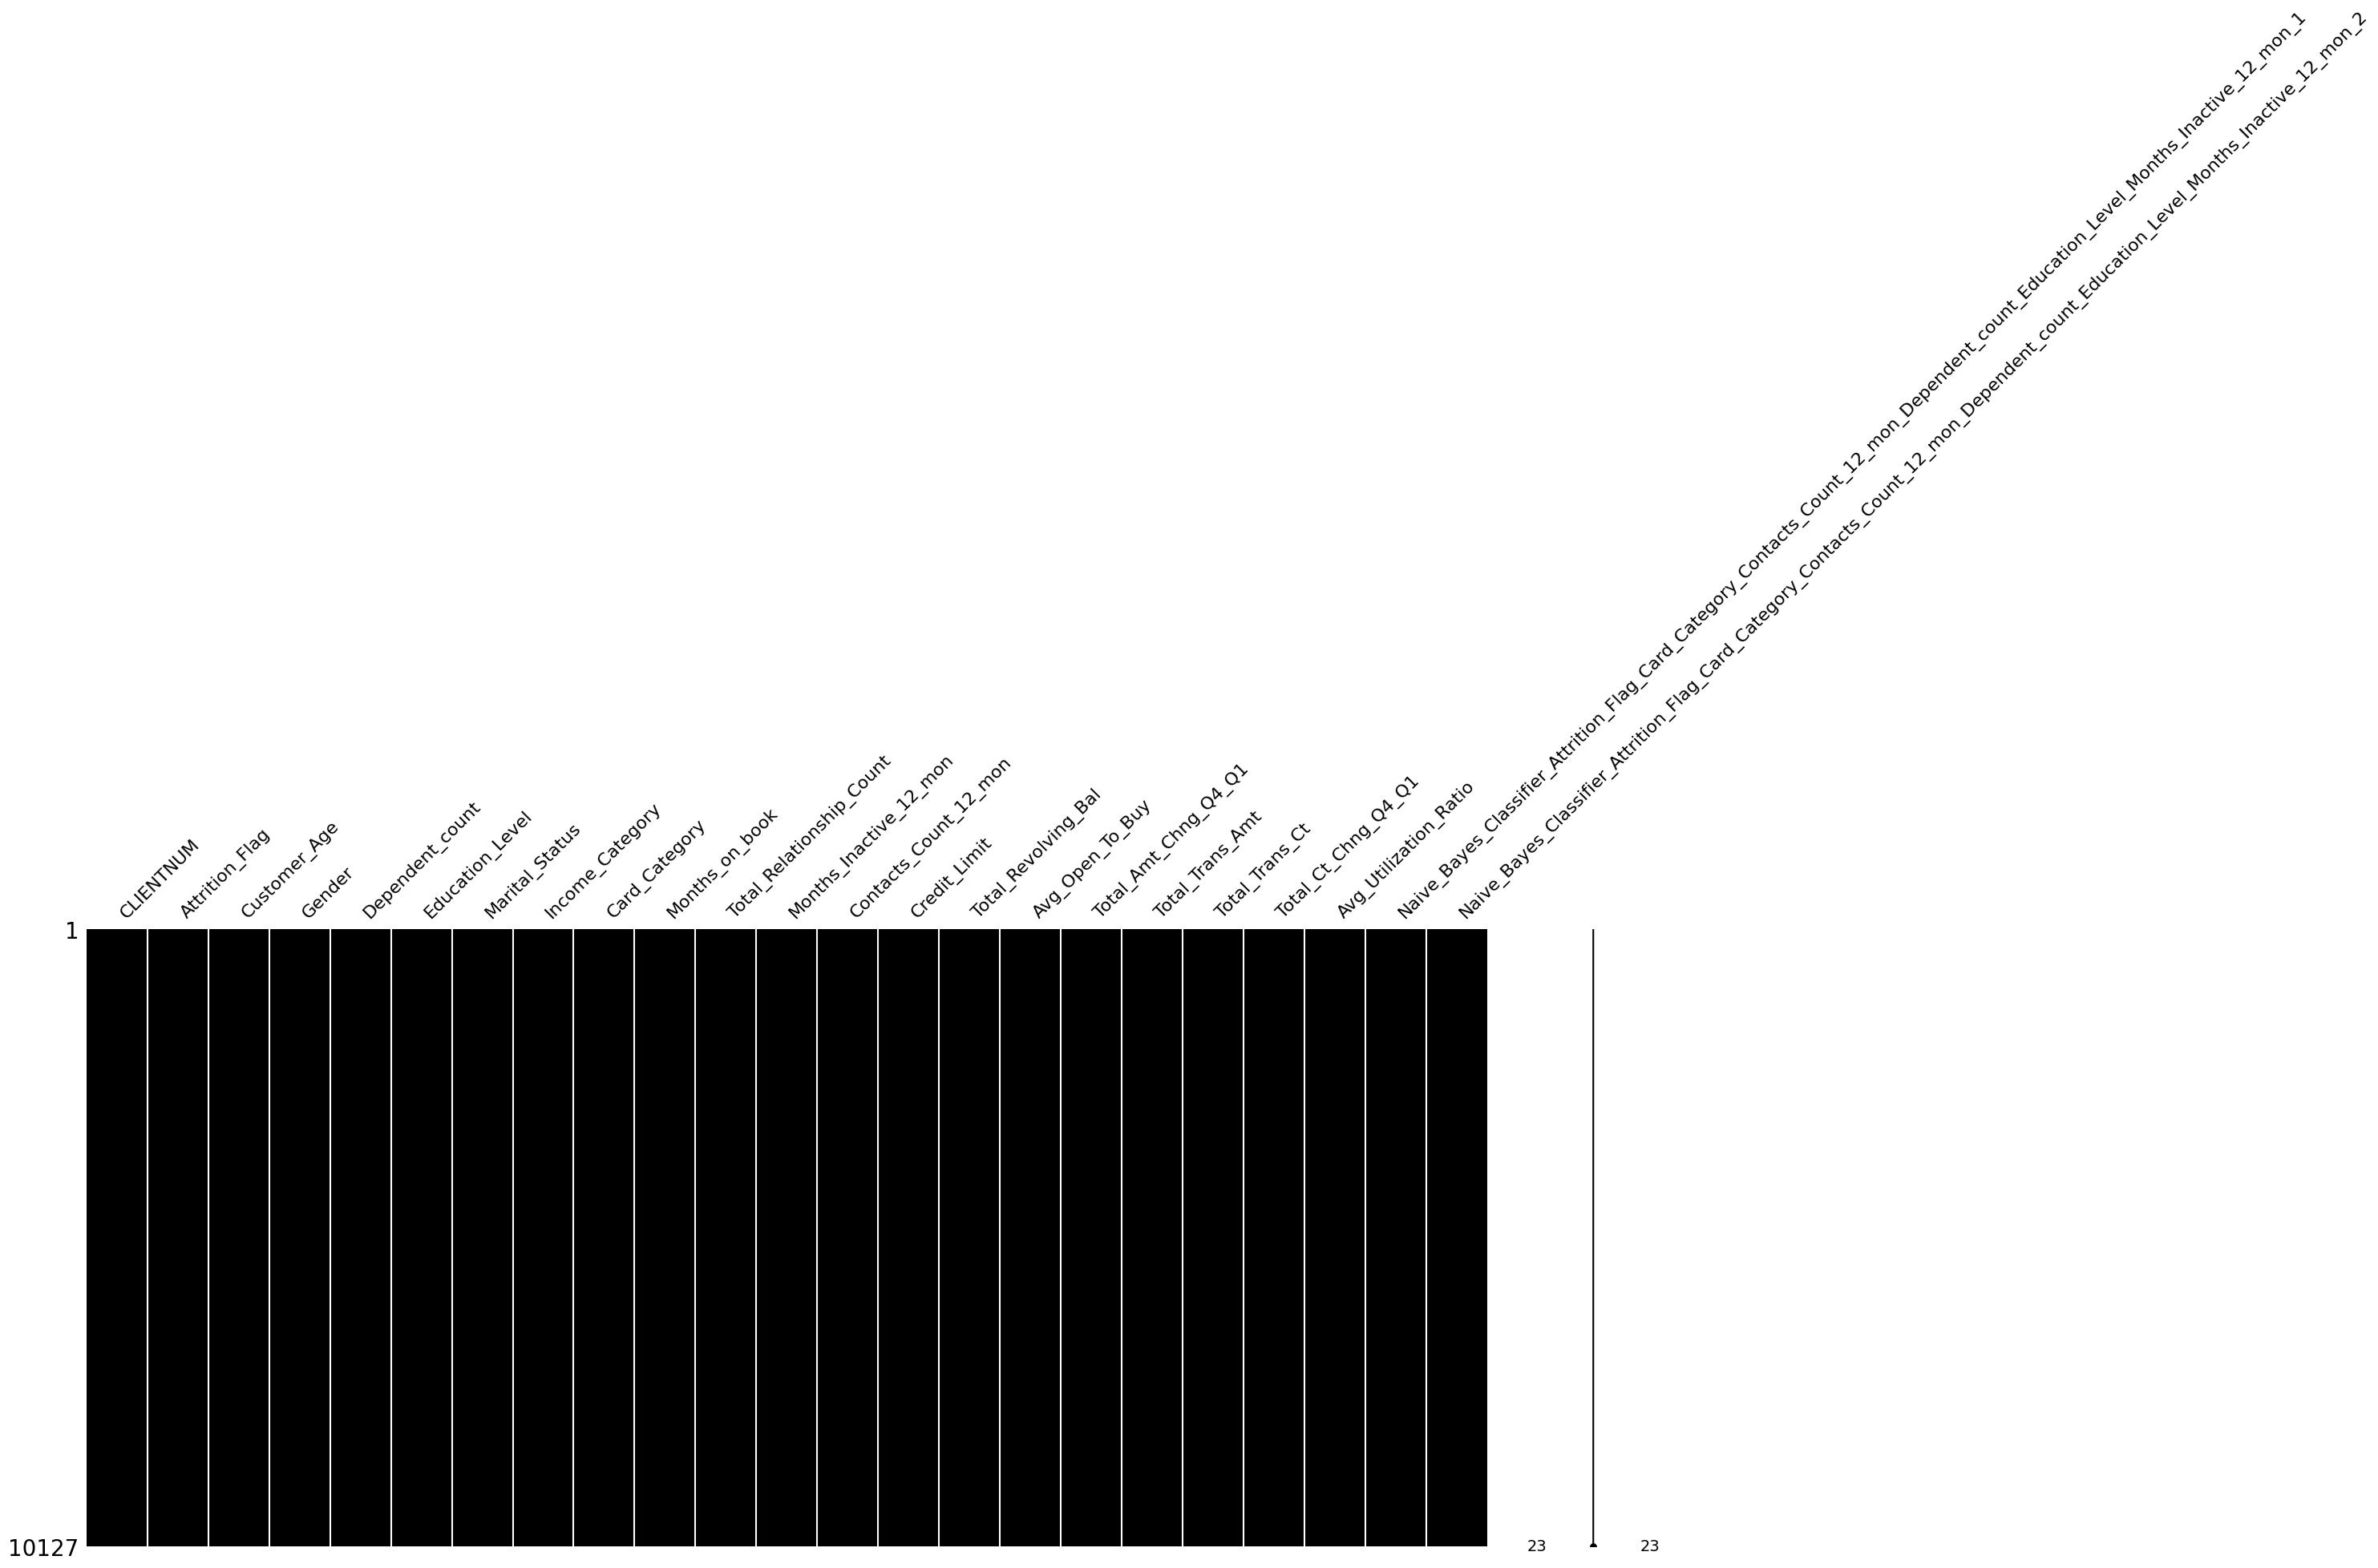

In [ ]:
import missingno as mn
mn.matrix(df,color=(0,0,0)) # to visualize the missing values


In [ ]:
def missing_data(df):

    total = df.isnull().sum().sort_values (ascending = False)

def missing_data(df):
    total = pd.DataFrame(df.isnull().sum(), columns=['Total'])
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])

missing_data(df) # percentage of null values

,Total,Percentage
,Total,0
CLIENTNUM,0,0.0
Attrition_Flag,0,0.0
Customer_Age,0,0.0
Gender,0,0.0
Dependent_count,0,0.0
Education_Level,0,0.0
Marital_Status,0,0.0
Income_Category,0,0.0
Card_Category,0,0.0


In [ ]:
df[df.duplicated()] # to findout duplicate rows in the dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [ ]:
round(df.describe(exclude = 'object'), 2)# statistics on numercal columns

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,0.0,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,NaN,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.84
std,3.690378e+07,NaN,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.37
min,7.080821e+08,NaN,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00,0.00
25%,7.130368e+08,NaN,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02,0.00,1.00
50%,7.179264e+08,NaN,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18,0.00,1.00
75%,7.731435e+08,NaN,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50,0.00,1.00
max,8.283431e+08,NaN,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00,1.00,1.00


In [ ]:
round(df.describe(exclude = [ 'float', 'int64']), 2)# statistics on string or categorical columns

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,F,Graduate,Married,Less than $40K,Blue
freq,5358,3128,4687,3561,9436


**Changing** **the** **Attrition_Flag** **to** 0 **and**  1   

In [253]:
df["Attrition_Flag"] = df["Attrition_Flag"] .map({"Existing Customer":0, "Attrited Customer":1}) # Existing customer has 0 and attrited have 1.

In [286]:
df.head()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1
0,3,5,1,3,12691.0,777,11914.0,1.335
1,5,6,1,2,8256.0,864,7392.0,1.541
2,3,4,1,0,3418.0,0,3418.0,2.594
3,4,3,4,1,3313.0,2517,796.0,1.405
4,3,5,1,0,4716.0,0,4716.0,2.175


In [288]:
#Finding the outliers....# Histograms to see how the data is being distributed

continuous_feature = [feature for feature in df.columns if df [feature].dtypes != '0']
Colors = ['#f03a17']


for feature in continuous_feature:
    data = df.copy()
    fig = px.histogram(df, x=feature, title='Distribution of ' + feature, color_discrete_sequence=Colors)
    fig.show()
print("Skewness: %f" % df['Attrition_Flag'].skew())
print("Kurtosis: %f" % df [ 'Attrition_Flag'].kurt()) #it helps to find out where maximum outliers are lying

KeyError: 'Attrition_Flag'

In [255]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len (numerical_features))

print('\n')

print('Numberical Variables Column: ', numerical_features)

print('\n')

#visualise the numerical variables.

df[numerical_features].head()#.style.set_properties({"background-color": "black", "color": "white", "

Number of numerical variables:  18


Numberical Variables Column:  ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Bank_Relationship_Period']




,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Bank_Relationship_Period
0,768805383,0,45,3,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,3
1,818770008,0,49,5,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0
2,713982108,0,51,3,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,3
3,769911858,0,40,4,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,3
4,709106358,0,40,3,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,2


In [19]:
from IPython.core.display import HTML

def multi_table(table_list):
    # Accepts a list of IpyTable objects and returns a table which contains each IpyTable in a cell

    return HTML(

        '<table><tr style="background-color: white;">' +

        ''.join(['<td>' + table.repr_html() + '</td>' for table in table_list]) + '</tr></table>'
    )

In [20]:
from IPython.core.display import HTML

def multi_table(table_list):
    # Accepts a list of IpyTable objects and returns a table which contains each IpyTable in a cell

    return HTML(

        '<table><tr style="background-color: black;">' +

        ''.join(['<td>' + table.to_html() + '</td>' for table in table_list]) + '</tr></table>'
    )

df_nunique = {var: pd.DataFrame(df['Attrition_Flag'].value_counts())
              for var in {'Attrition_Flag'}}
multi_table([ df_nunique['Attrition_Flag'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "white"})])

,count
Attrition_Flag,
0,8500
1,1627


In [13]:
fig = make_subplots(rows=1, cols=1)
Colors = ['#0078d7', '#16c60c', '#f03a17', '#00f8d7', '#f0f87f']
fig.add_trace(go.Bar(y = df['Attrition_Flag'].value_counts().values.tolist(),
                     x = df['Attrition_Flag'].value_counts().index,
                    text=df['Attrition_Flag'].value_counts().values.tolist(),
            textfont=dict(size=15),
                    textposition = 'outside',
                    showlegend=False,
            marker = dict(color = Colors,
                          line_color = 'black',
                          line_width=3)), row = 1 , col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor':'top'},
           template='plotly_white')
fig.update_yaxes (range=[0,10500])
iplot(fig)

In [21]:
df_nunique = {var: pd.DataFrame(df['Customer_Age'].value_counts())
             for var in {'Customer_Age'}} # Run the cell that defines the multi_table function
multi_table([ df_nunique['Customer_Age'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "transparent"})])

,count
Customer_Age,
44,500
49,495
46,490
45,486
47,479
43,473
48,472
50,452
42,426


In [22]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Customer_Age'].value_counts().values.tolist(),
                     x = df['Customer_Age'].value_counts().index,
                     text=df['Customer_Age'].value_counts().values.tolist(),
          textfont=dict(size=15),
                  textposition = 'outside',
                  showlegend=False,
          marker = dict(color = 'white',
                        line_color = 'black',
                        line_width=3)), row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                          'yanchor': 'top'},
                template='plotly_white')
fig.update_yaxes (range=[0,650])
iplot(fig)

In [23]:
df['Age']=0
df.loc[(df['Customer_Age']>25)&(df ['Customer_Age']<=35), 'Age']=0
df.loc[(df['Customer_Age']>35)&(df ['Customer_Age']<=45), 'Age']=1
df.loc[(df['Customer_Age']>45)&(df ['Customer_Age']<=55), 'Age']=2
df.loc[(df['Customer_Age']>55)&(df ['Customer_Age']<=65), 'Age']=3
df.loc[df['Customer_Age']>65, 'Age']=4
df['Age']=df['Age'].astype(int)



In [25]:
df.drop([ 'Customer_Age' ], axis = 1, inplace = True)

In [27]:
df_nunique = {var: pd.DataFrame(df['Age'].value_counts())
              for var in {'Age'}}
multi_table([ df_nunique['Age'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black"})])

,count
Age,
2,4135
1,3742
3,1321
0,919
4,10


In [28]:
fig = make_subplots (rows=1,cols=1)
Colors = ['#0078d7', '#16c60c', '#f03a17', '#00f8d7', '#f0f87f']
fig.add_trace(go.Bar(y = df['Age'].value_counts().values.tolist(),
                     x = df['Age'].value_counts().index,
                     text=df['Age'].value_counts().values.tolist(),
          textfont=dict(size = 15 ) ,
                  textposition = 'outside',
                  showlegend=False,
          marker = dict(color = Colors,
                        line_color= 'black',
                        line_width=3)),row = 1, col = 1)

fig.update_layout(title ={'y' : 0.9,
                          'x' : 0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
               template='plotly_white')
fig.update_yaxes (range=[0,5000])
iplot(fig)

In [29]:
fig = px.histogram(df, x="Age", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group', color_discrete_sequence={
               0: "#f0f87f",
               1: "#4696f9"})
fig.update_layout (bargap=0.2)

fig.show()

In [33]:
df_nunique = {var: pd.DataFrame(df['Dependent_count'].value_counts()) for var in {'Dependent_count'}}
multi_table([ df_nunique[var].style.set_properties(**{"background-color": "black","color": "white", "border-color": 'black'}).set_caption(var) for var in df_nunique])

,count
Dependent_count,
3,2732
2,2655
1,1838
4,1574
0,904
5,424


In [35]:
fig = make_subplots (rows=1,cols=1)
Colors = ['#0078d7', '#16c60c', '#f03a17', '#00f8d7', '#f0f87f']
fig.add_trace(go.Bar(y = df['Dependent_count'].value_counts().values.tolist(),
                     x = df['Dependent_count'].value_counts().index,
                     text=df['Dependent_count'].value_counts().values.tolist(),
          textfont=dict(size = 15 ) ,
                  textposition = 'outside',
                  showlegend=False,
          marker = dict(color = Colors,
                        line_color= 'black',
                        line_width=3)),row = 1, col = 1)

fig.update_layout(title ={'y' : 0.9,
                          'x' : 0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
               template='plotly_white')
fig.update_yaxes (range=[0,5000])
iplot(fig)

In [36]:
fig = px.histogram(df, x="Dependent_count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group', color_discrete_sequence={
               0: "#f0f87f",
               1: "#4696f9"})
fig.update_layout (bargap=0.2)

fig.show()

In [38]:
df_nunique = {var: pd.DataFrame(df['Months_on_book'].value_counts()) for var in {'Months_on_book'}}
multi_table([ df_nunique['Months_on_book'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "white","border-width": "1px","text-align": "center"})])

,count
Months_on_book,
36,2463
37,358
34,353
38,347
39,341
40,333
31,318
35,317
33,305


In [106]:
df['Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>=0)&(df['Months_on_book'] <= 10 ) , 'Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>10)&(df['Months_on_book' ]<= 20 ) , 'Bank_Relationship_Period']=1
df.loc[(df['Months_on_book']>20)&(df['Months_on_book']<=30), 'Bank_Relationship_Period']=2
df.loc[(df['Months_on_book']>30)&(df['Months_on_book']<=40), 'Bank_Relationship_Period']=3
df.loc[df['Months_on_book']>50, 'Bank_Relationship_Period']=4



In [162]:
# Add a print statement to check if the column is added
df['Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>=0)&(df['Months_on_book'] <= 10 ) , 'Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>10)&(df['Months_on_book' ]<= 20 ) , 'Bank_Relationship_Period']=1
df.loc[(df['Months_on_book']>20)&(df['Months_on_book']<=30), 'Bank_Relationship_Period']=2
df.loc[(df['Months_on_book']>30)&(df['Months_on_book']<=40), 'Bank_Relationship_Period']=3
df.loc[df['Months_on_book']>50, 'Bank_Relationship_Period']=4

print(df.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Bank_Relationship_Period'],
      dtype='object')


In [285]:
 df['Bank_Relationship_Period']=df['Bank_Relationship_Period'].astype(int)

KeyError: 'Bank_Relationship_Period'

In [165]:
# Change the column name to match the existing column in the DataFrame
df.drop(['Months_on_book'], axis=1, inplace=True)

In [170]:
df_nunique = {var: pd.DataFrame(df['Bank_Relationship_Period'].value_counts()) for var in {'Bank_Relationship_Period'}}
multi_table([df_nunique[var].style.set_properties(**{"background-color": "black","color": "white", "border": "1px solid black"}) for var in {'Bank_Relationship_Period'}])

In [284]:
# Convert the data type of the categorical features to 'object'
cat_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df[cat_features] = df[cat_features].astype('object')

# Create the list of categorical features
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'object']

# Print the number of categorical features and their names
print('Number of categorical variables: ', len(cat_features))
print("\n")
print('Categorical variables column name:', cat_features)
print("\n")

# Visualize the categorical variables
df[cat_features].head().style.set_properties(subset=["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"],
                                            props={"width": "200px"})

KeyError: "None of [Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',\n       'Card_Category'],\n      dtype='object')] are in the [columns]"

In [190]:
df_nunique = {var: pd.DataFrame(df['Gender'].value_counts()) for var in {'Gender'}}
multi_table([df_nunique['Gender'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black",})])

In [191]:
fig = make_subplots (rows=1,cols=1)
Colors = ['#0078d7', '#16c60c', '#f03a17', '#00f8d7', '#f0f87f']
fig.add_trace(go.Bar(y = df['Gender'].value_counts().values.tolist(),
                     x = df['Gender'].value_counts().index,
                     text=df['Gender'].value_counts().values.tolist(),
          textfont=dict(size = 15 ) ,
                  textposition = 'outside',
                  showlegend=False,
          marker = dict(color = Colors,
                        line_color= 'black',
                        line_width=3)),row = 1, col = 1)

fig.update_layout(title ={'y' : 0.9,
                          'x' : 0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
               template='plotly_white')
fig.update_yaxes (range=[0,8000])
iplot(fig)

In [192]:
fig = px.histogram(df, x="Gender", color = "Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group', color_discrete_sequence={
             0: "#f0f87f",
             1: "#4696f9"})
fig.update_layout (bargap=0.2)
fig.show()



In [196]:
df_nunique = {var: pd.DataFrame(df['Education_Level'].value_counts())
              for var in {'Education_Level'}}
multi_table([df_nunique['Education_Level'].style.set_properties(**{"background-color": "black","color": "white", "border-color":"black"})])

In [197]:
fig = make_subplots (rows=1,cols=1)
Colors = ['#0078d7', '#16c60c', '#f03a17', '#00f8d7', '#f0f87f']
fig.add_trace(go.Bar(y = df['Education_Level'].value_counts().values.tolist(),
                     x = df['Education_Level'].value_counts().index,
                     text=df['Education_Level'].value_counts().values.tolist(),
          textfont=dict(size = 15 ) ,
                  textposition = 'outside',
                  showlegend=False,
          marker = dict(color = Colors,
                        line_color= 'black',
                        line_width=3)),row = 1, col = 1)

fig.update_layout(title ={'y' : 0.9,
                          'x' : 0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
               template='plotly_white')
fig.update_yaxes (range=[0,8000])
iplot(fig)

In [198]:
fig = px.histogram(df, x="Education_Level", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group', color_discrete_sequence={
               0: "#f0f87f",
               1: "#4696f9"})
fig.update_layout (bargap=0.2)

fig.show()

In [200]:
df_nunique = {var: pd.DataFrame(df['Marital_Status'].value_counts()) for var in {'Marital_Status'}}
multi_table([ df_nunique['Marital_Status'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "white","border-width": "1px","text-align": "center"})])

In [201]:
fig = make_subplots (rows=1,cols=1)
Colors = ['#0078d7', '#16c60c', '#f03a17', '#00f8d7', '#f0f87f']
fig.add_trace(go.Bar(y = df['Marital_Status'].value_counts().values.tolist(),
                     x = df['Marital_Status'].value_counts().index,
                     text=df['Marital_Status'].value_counts().values.tolist(),
          textfont=dict(size = 15 ) ,
                  textposition = 'outside',
                  showlegend=False,
          marker = dict(color = Colors,
                        line_color= 'black',
                        line_width=3)),row = 1, col = 1)

fig.update_layout(title ={'y' : 0.9,
                          'x' : 0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
               template='plotly_white')
fig.update_yaxes (range=[0,8000])
iplot(fig)

In [202]:
fig = px.histogram(df, x="Marital_Status", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group', color_discrete_sequence={
               0: "#f0f87f",
               1: "#4696f9"})
fig.update_layout (bargap=0.2)

fig.show()

In [205]:
df_nunique = {var: pd.DataFrame(df['Income_Category'].value_counts()) for var in {'Income_Category'}}
multi_table([df_nunique['Income_Category'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "white","border-width": "1px","text-align": "center"})])

In [206]:
fig = make_subplots (rows=1,cols=1)
Colors = ['#0078d7', '#16c60c', '#f03a17', '#00f8d7', '#f0f87f']
fig.add_trace(go.Bar(y = df['Income_Category'].value_counts().values.tolist(),
                     x = df['Income_Category'].value_counts().index,
                     text=df['Income_Category'].value_counts().values.tolist(),
          textfont=dict(size = 15 ) ,
                  textposition = 'outside',
                  showlegend=False,
          marker = dict(color = Colors,
                        line_color= 'black',
                        line_width=3)),row = 1, col = 1)

fig.update_layout(title ={'y' : 0.9,
                          'x' : 0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
               template='plotly_white')
fig.update_yaxes (range=[0,8000])
iplot(fig)

In [207]:
fig = px.histogram(df, x="Income_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group', color_discrete_sequence={
               0: "#f0f87f",
               1: "#4696f9"})
fig.update_layout (bargap=0.2)

fig.show()

In [209]:
df_nunique = {var: pd.DataFrame(df['Card_Category'].value_counts()) for var in {'Card_Category'}}
multi_table([ df_nunique['Card_Category'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "white","border-width": "1px","text-align": "center"})])

In [210]:
fig = make_subplots (rows=1,cols=1)
Colors = ['#0078d7', '#16c60c', '#f03a17', '#00f8d7', '#f0f87f']
fig.add_trace(go.Bar(y = df['Card_Category'].value_counts().values.tolist(),
                     x = df['Card_Category'].value_counts().index,
                     text=df['Card_Category'].value_counts().values.tolist(),
          textfont=dict(size = 15 ) ,
                  textposition = 'outside',
                  showlegend=False,
          marker = dict(color = Colors,
                        line_color= 'black',
                        line_width=3)),row = 1, col = 1)

fig.update_layout(title ={'y' : 0.9,
                          'x' : 0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
               template='plotly_white')
fig.update_yaxes (range=[0,8000])
iplot(fig)

In [211]:
fig = px.histogram(df, x="Card_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group', color_discrete_sequence={
               0: "#f0f87f",
               1: "#4696f9"})
fig.update_layout (bargap=0.2)

fig.show()

In [257]:
corrmat = df .corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Blues",linewidths=3.5,
    linecolor='white')

ValueError: could not convert string to float: 'Blue'

TypeError: unsupported operand type(s) for /: 'str' and 'int'

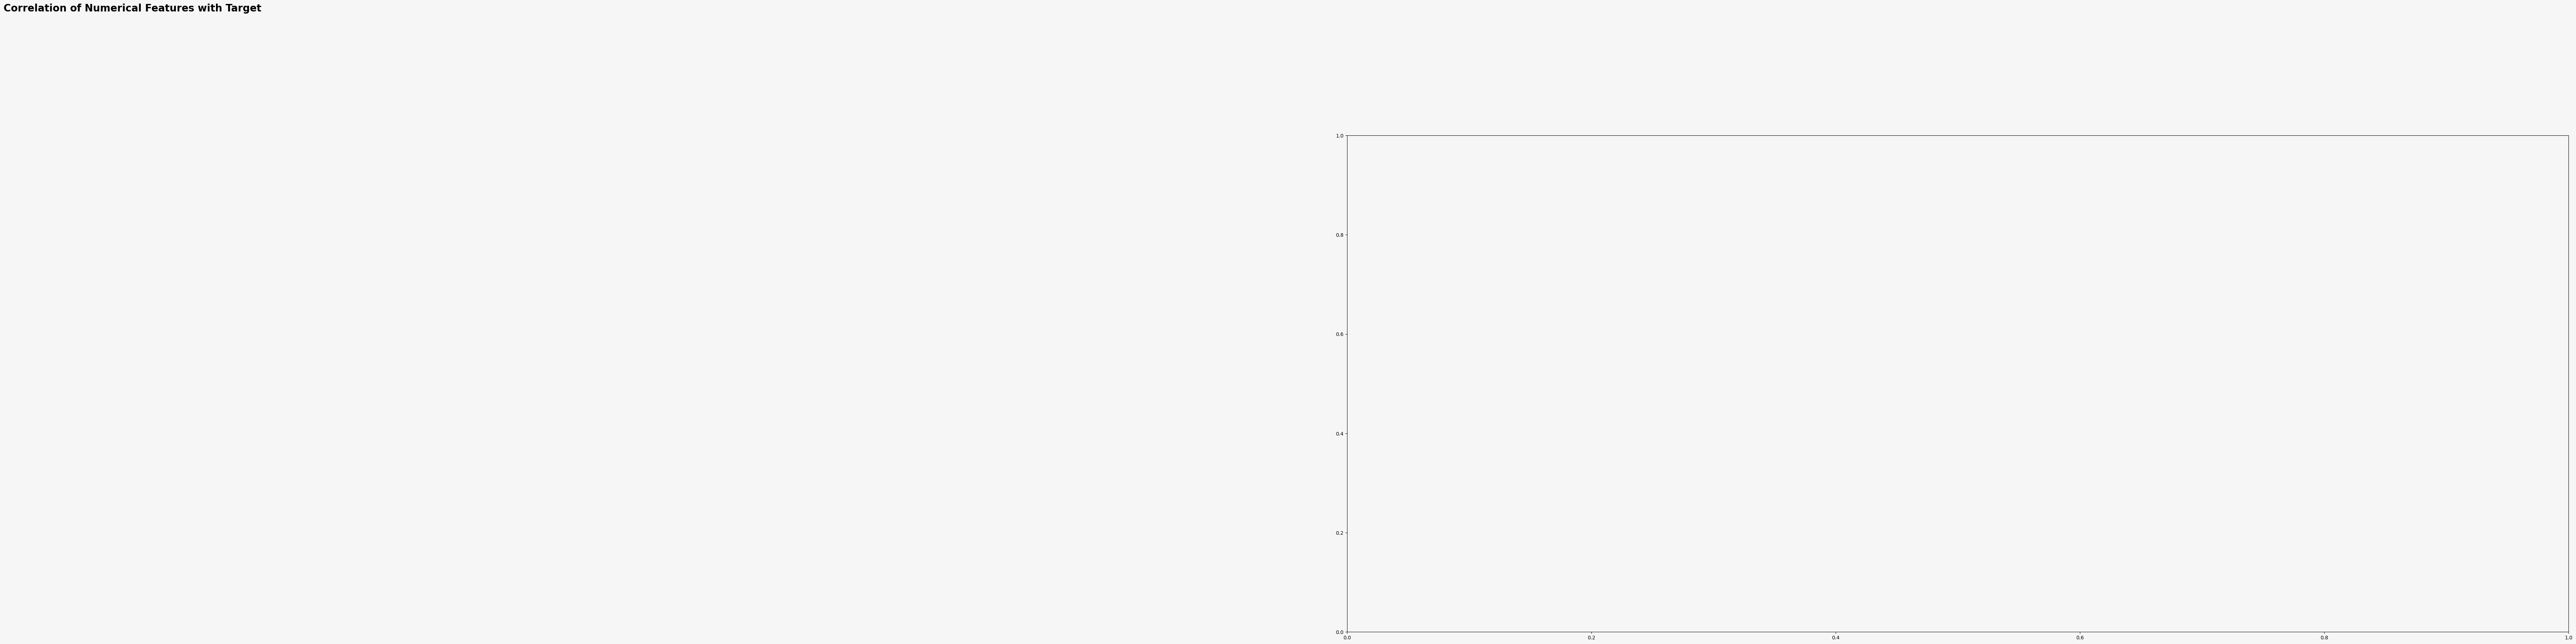

In [256]:
import matplotlib
background_color = "#f6f6f6"

fig = plt.figure(figsize=(44,18), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#0078d7"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df.corrwith(df['Attrition_Flag']).to_frame())
chart_df = pd.DataFrame({'corr': df.corrwith(df['Attrition_Flag'])})
# Option 1: Convert the Series to a DataFrame explicitly
chart_df = pd.DataFrame(df.corrwith(df['Attrition_Flag']))

# Option 2: Use the Series.reset_index() method
chart_df = df.corrwith(df['Attrition_Flag']).reset_index()
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='#0078d7', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top", "right", 'left']:
   ax0.spines [s].set_visible(False)

plt.show()


In [246]:
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Bank_Relationship_Period
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,3
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0


In [248]:
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level','Marital_Status','Income_Category'],drop_first=True)
print(df_new.shape)

(10127, 34)


In [249]:
df_new.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Bank_Relationship_Period', 'Gender_M', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_

In [258]:
df_new.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Bank_Relationship_Period,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,768805383,Existing Customer,45,3,Blue,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,3,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False
1,818770008,Existing Customer,49,5,Blue,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False


In [264]:
#Rearrangement of the columns....

df = df_new[['Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',]]

'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',

'Avg_Utilization_Ratio', 'Age', 'Bank_Relationship_Period', 'Gender_F', 'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',

'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated',

'Education_Level_Unknown', 'Marital_Status_Divorced',

'Marital_Status_Married', 'Marital_Status_Single',

'Marital_Status_Unknown', 'Income_Category_$120K +',

'Income_Category_$40K $60K', 'Income_Category_$60K $80K',

income_categories = ['Income_Category_$80K $120K', 'Income_Category_Less than $40K']
card_categories = ['Card_Category_Blue', 'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver']
target_columns = ['Income_Category_Unknown'] + card_categories + ['Attrition_Flag']

df.head(2).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black", "font-size":"11"})

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1
0,3,5,1,3,12691.000000,777,11914.000000,1.335000
1,5,6,1,2,8256.000000,864,7392.000000,1.541000


Scaling the dataset

In [279]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('Attrition_Flag',axis=1))
scaled_features = scaler.transform(df.drop('Attrition_Flag',axis=1))



KeyError: "['Attrition_Flag'] not found in axis"

In [271]:
if 'Attrition_Flag' in df.columns:
    # Drop the column if it exists
    df.drop('Attrition_Flag', axis=1, inplace=True)
else:
    print("Column 'Attrition_Flag' does not exist in the DataFrame")

Column 'Attrition_Flag' does not exist in the DataFrame


In [272]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)

In [280]:
scaled_features = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_features.head().style.set_properties(**{"background-color": "black", "color": "white", "border-color": "black", "font-size": 16})

ValueError: Shape of passed values is (10127, 8), indices imply (10127, 7)

In [281]:
# Drop the 'Attrition_Flag' column from the DataFrame
df.drop('Attrition_Flag', axis=1, inplace=True)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)

# Create a new DataFrame with the scaled features and the original column names
scaled_features = pd.DataFrame(scaled_features, columns=df.columns)

# Print the first five rows of the scaled features DataFrame
scaled_features.head().style.set_properties(**{"background-color": "black", "color": "white", "border-color": "black", "font-size": 16})

KeyError: "['Attrition_Flag'] not found in axis"

In [275]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.values)

if 'Attrition_Flag' in df.columns:
    # Drop the column if it exists
    df.drop('Attrition_Flag', axis=1, inplace=True)
else:
    print("Column 'Attrition_Flag' does not exist in the DataFrame")

scaled_features = pd.DataFrame(scaled_features, columns=df.columns)

scaled_features.head().style.set_properties(
    {"background-color": "black", "color": "white", "border-color": "black", "font-size": 16}
)

Column 'Attrition_Flag' does not exist in the DataFrame


IndexingError: Too many indexers

In [276]:
scaled_features = scaler.fit_transform(df.values)

In [283]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('Attrition_Flag', axis=1))
scaled_features = scaler.transform(df.drop('Attrition_Flag',axis=1))



KeyError: "['Attrition_Flag'] not found in axis"

In [291]:
scaled_features = pd.DataFrame(scaled_features, columns=df.columns[:-1])

scaled_features.head().style.set_properties(**{'background-color': 'black', 'color': 'white', 'border-color': 'black', 'font-size': 12})

ValueError: Shape of passed values is (10127, 8), indices imply (10127, 7)

In [292]:
#Splitting the dataset
X = scaled_features
y = df['Attrition_Flag']



KeyError: 'Attrition_Flag'

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

NameError: name 'y' is not defined

In [296]:
rs = 15
clrs = []

clrs.append(AdaBoostClassifier (random_state=rs))

clrs.append(GradientBoostingClassifier(random_state=rs))

clrs.append(Random ForestClassifier (random_state=rs))

clrs.append(ExtraTreesClassifier(random_state = rs))

clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []

for clr in clrs:

cv_results.append(cross_val_score(clr, X_train, y_train, scoring = 'accuracy', cv kfold, n_jobs=-1))

cv_means= []

cv_std =[]

for cv_result in cv_results:

cv_means.append(cv_result.mean())

cv_std.append(cv_result.std())

cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means, "CrossValerrors": cv_std, "Algo": ["Random ForestClassifier", "AdaBoostClassifier"]})
g = sns.barplot("CrossVal_Score_Means", "Algo", data = cv_df, orient = "h", xerr=cv_std, color = '#0078d7')
g.set_xlabel("Mean Accuracy", fontsize = 18)

underline g = gg.set_title("Cross validation scores", fontsize = 24)

plt.figure(figsize = (12,8))

print(cv_df)

I

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-296-c3c4b1cba8f8>, line 8)

In [299]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion': ['gini','entropy'],
   'max_depth': [3,5,7,10],
   'min_samples_split' : range(2, 10, 1),
   'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

NameError: name 'dtc' is not defined

In [301]:
kfold StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

rs = 15

clrs = []

clrs.append(AdaBoostClassifier (random_state=rs))

clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(Random ForestClassifier(random_state=rs))
clrs.append(ExtraTrees Classifier(random_state = rs ) clrs.append(DecisionTreeClassifier (random_state = rs))

cv_results = []

for clr in clrs:

cv_results.append(cross_val_score(clr, X_train, y_train, scoring = 'accuracy', cvkfold, n_jobs=-1))

cv_means = []

cv_std = []

for cv_result in cv_results:

cv_means.append(cv_result.mean())
cv_std.append(std())

cv_df = pd.DataFrame({"CrossVal_Score_Means": cv_means, "CrossValerrors": cv_std, "Algo": ["Random ForestClassifier", "AdaBoostClassifier"]})
sigma = sns.barplot("CrossVal_Score_Means", "Algo", data=cv_df, orient="h", xerr=cv_std, color="#0078d7")

g.set_xlabel("Mean Accuracy", fontsize=18)
g = g.

plt.figure(figsize = (12,8))

print(cv_df)

SyntaxError: invalid syntax (<ipython-input-301-8d4c2f856735>, line 1)

In [302]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)




NameError: name 'X_train' is not defined

In [303]:
from sklearn.tree import DecisionTreeClassifier

# Load the training data
# ...

# Create the decision tree classifier
dtc = DecisionTreeClassifier()

# Train the decision tree classifier
dtc.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = dtc.predict(X_test)

NameError: name 'X_train' is not defined

In [304]:
confusion_matrix(y_test, y_pred)


NameError: name 'confusion_matrix' is not defined

In [305]:
from sklearn.model_selection import GridSearchCV

grid_params = {

'criterion': ['gini', 'entropy'],
'max_depth': [3, 5, 7, 10],
'min_samples_split': range(2, 10, 1),
'min_samples_leaf': range(2, 10, 1)

}

grid_search = GridSearchCV(dtc, grid_params, cv = 5 , n_jobs = 1, verbose = 1)
grid_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [308]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [309]:
print(accuracy_score(y_test, y_pred)) ### 1.5% huge diff


NameError: name 'accuracy_score' is not defined

In [311]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Checking The Best Parameters

In [315]:
ada = AdaBoostClassifier(base_estimator=dtc)
parameters = {
   'n_estimators': [ 50, 70, 90, 120, 180, 200] ,
}
   'learning_rate': [0.001, 0.01, 0.1, 1, 10],
parameters = {
   'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv= 10, verbose = 1)
grid_search.fit(X_train, y_train)

IndentationError: unexpected indent (<ipython-input-315-35f0b0308e53>, line 5)

In [316]:
print(grid_search.best_params_)
print(grid_search.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [317]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 1, n_estimators = 120)
ada.fit(X_train, y_train)

NameError: name 'AdaBoostClassifier' is not defined

In [318]:
plot_confusion_matrix( ada,
                      X_test, y_test,
                       cmap=plt.cm.Blues,
                       display_lables = ['Attributionn_0','Attritionn_1'])
plt.grid(False)
plt.show();

NameError: name 'plot_confusion_matrix' is not defined

In [319]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

In [320]:
print(accuracy_score(y_test, y_pred))

NameError: name 'accuracy_score' is not defined

In [321]:
feature = pd. Series(ada.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

NameError: name 'ada' is not defined